# Matplotlib Scatter Plots

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [14]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

df_exploded = df_DA.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
)

skill_stats = skill_stats.sort_values('skill_count', ascending=False).head(10)


C:\Users\rbrod\AppData\Local\Temp\ipykernel_6456\692008312.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (skill_stats['skill_count'][i], skill_stats['median_salary'][i]))


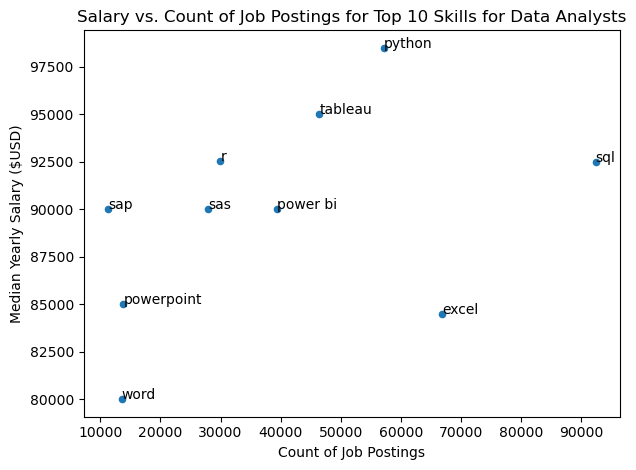

In [21]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills for Data Analysts')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.tight_layout()
for i, txt in enumerate(skill_stats.index):
    plt.annotate(txt, (skill_stats['skill_count'][i], skill_stats['median_salary'][i]))

plt.show()

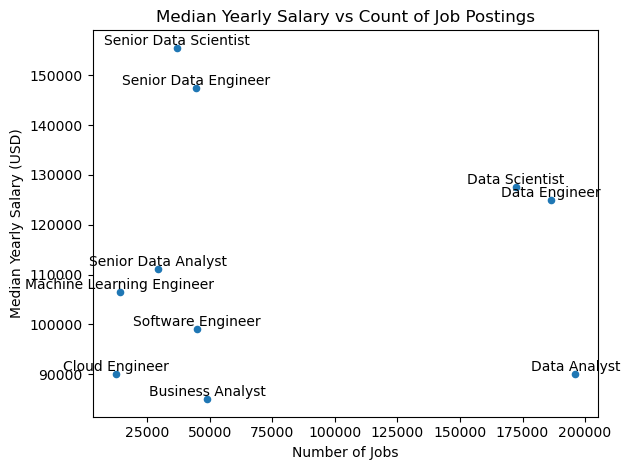

In [28]:
df_MYS = df.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False)

job_title_stats = df.groupby('job_title_short').agg(
 median_salary_year_avg=('salary_year_avg', 'median'),
 job_count=('job_title_short', 'count')
).dropna()

# Plotting the results
job_title_stats.plot(kind='scatter', x='job_count', y='median_salary_year_avg')
plt.xlabel('Number of Jobs')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Median Yearly Salary vs Count of Job Postings')

# Adding job title labels to each point
for i in range(len(job_title_stats)):
 job_count = job_title_stats['job_count'].iloc[i]
 mean_salary = job_title_stats['median_salary_year_avg'].iloc[i]
 job_title = job_title_stats.index[i]
 plt.text(job_count, mean_salary, job_title, ha='center', va='bottom')

 plt.tight_layout()

plt.show()


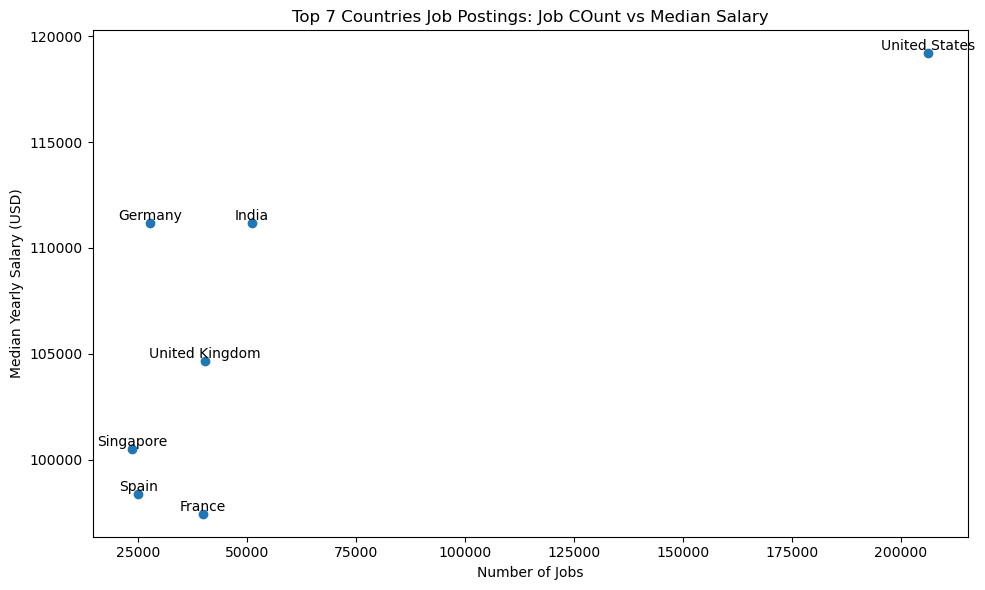

In [31]:


# Group by 'job_country' and calculate median salary and job count
job_country_stats = df.groupby('job_country').agg(
    median_salary_year_avg=('salary_year_avg', 'median'),
    job_count=('job_country', 'count')
).dropna()

# Limit to the top 7 countries by job count
top_countries = job_country_stats.sort_values(by='job_count', ascending=False).head(7)

# Plotting the results
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size for better layout
plt.scatter(top_countries['job_count'], top_countries['median_salary_year_avg'])

# Add labels and title
plt.xlabel('Number of Jobs')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Top 7 Countries Job Postings: Job COunt vs Median Salary')

# Adding country labels to each point
for i in range(len(top_countries)):
    job_count = top_countries['job_count'].iloc[i]
    median_salary = top_countries['median_salary_year_avg'].iloc[i]
    job_country = top_countries.index[i]
    plt.text(job_count, median_salary, job_country, ha='center', va='bottom')

# Adjust layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()


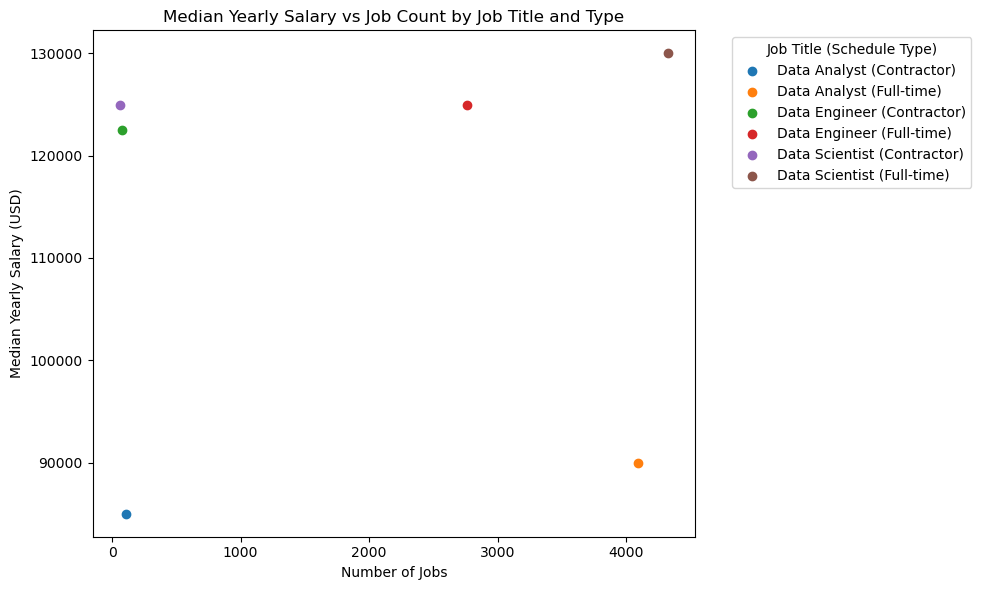

In [36]:
# Filtering the dataframes by criteria
df_US = df[df['job_country'] == 'United States']

df_USJS = df_US[df_US['job_schedule_type'].isin(['Full-time', 'Contractor'])].copy()


df_filtered = df_USJS[df_USJS['salary_year_avg'].notna()].copy()

df_filtered['job_title_type'] = df_filtered['job_title_short'] + ' (' + df_filtered['job_schedule_type'] + ')'

df_filteredf = df_filtered[df_filtered['job_title_short'].isin(['Data Analyst', 'Data Scientist', 'Data Engineer'])].copy()

# Group by 'job_title_type' and calculate the median salary and job count
df_plot = df_filteredf.groupby('job_title_type').agg(
    median_salary=('salary_year_avg', 'median'),
    job_count=('job_title_type', 'count')
).reset_index()

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Loop through unique job_title_type values and plot each one
for job_type in df_plot['job_title_type'].unique():
    subset = df_plot[df_plot['job_title_type'] == job_type]
    plt.scatter(
        subset['job_count'], 
        subset['median_salary'], 
        label=job_type  # Set the label for the legend
    )

# Add labels, title, and legend
plt.xlabel('Number of Jobs')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Median Yearly Salary vs Job Count by Job Title and Type')
plt.legend(title='Job Title (Schedule Type)', bbox_to_anchor=(1.05, 1), loc='upper left')  # Ensure legend appears outside

# Adjust layout to avoid clipping
plt.tight_layout()

# Display the plot
plt.show()
